In [1]:
# Importing essential libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the data
df_orig = pd.read_csv('Training_Data.csv')

# Presenting data in the dataframe.
df_orig.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**1. Show overall descriptive statistics of your dataset; number of data points, number of descriptive features, type of features, your target feature, and its type. (10 points)**

In [3]:
# Number of records present currently in the dataframe. Here 252000 indicates the number of rows 
# and 13 indicates the number of columns present.
df_orig.shape

(252000, 13)

In [4]:
# Display all the columns in the dataframe along with respective data type.
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# Standardising the Feature names in the dataframe.
df_orig.rename(columns={'CITY':'City','STATE':'State','CURRENT_JOB_YRS':'Current_Job_Years',
                   'CURRENT_HOUSE_YRS':'Current_House_Years'},inplace=True)
(df_orig.columns).tolist()

['Id',
 'Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'City',
 'State',
 'Current_Job_Years',
 'Current_House_Years',
 'Risk_Flag']

**The following dataframe is enlightening us more about the dataset. The types of features are described with respect to the datatype as well as the category to which each feature is belonging to.**

In [6]:
# Data description of all features present in the file.
data_desc = pd.read_csv('Data_Dictionary.csv')
data_desc

,Column_Name,Data_Description,Data_Class,Data_Type,Domain
0,Id,Customer Identification Number,Categorical,int,Positive integers
1,Income,Income of the Customer,Continuous,int,Positive integers
2,Age,Age of the Customer,Continuous,int,Positive integers
3,Experience,Total Professional Experience in Years,Continuous,int,Positive integers
4,Married/Single,Marital Status of the Customer,Categorical,string,"[single,married]"
5,House_Ownership,Home Ownership Status of the Customer,Categorical,string,"3 String values [rented,owned,norent_noown]"
6,Car_Ownership,Car Ownership Status of the Customer,Categorical,string,"[yes,no]"
7,Profession,Occupation of the Customer,Categorical,string,51 String values
8,City,City of Residence,Categorical,string,317 String values
9,State,State of Residence,Categorical,string,29 String values


In [7]:
# Exclude target label from given features in analysis
df = df_orig.iloc[:,:-1]
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [8]:
# Segragating numerical features.
numerical_vars = data_desc[(data_desc['Data_Type']=='int') & (data_desc['Column_Name'] != 'Risk_Flag')]['Column_Name']
numerical_vars.reset_index(drop=True, inplace=True)
numerical_vars

0                     Id
1                 Income
2                    Age
3             Experience
4      Current_Job_Years
5    Current_House_Years
Name: Column_Name, dtype: object

In [9]:
# Segragating string variables, all of which are categorical
string_vars = data_desc[data_desc['Data_Type']=='string']['Column_Name']
string_vars.reset_index(drop=True, inplace=True)
string_vars

0     Married/Single
1    House_Ownership
2      Car_Ownership
3         Profession
4               City
5              State
Name: Column_Name, dtype: object

**The statistical information of the numerical features in our dataset is as follows:-**

In [10]:
# Statistical Information about the numeric data
desc_numeric = pd.DataFrame()

for var in numerical_vars:
    temp_df = pd.DataFrame()
    temp_df["Feature"] = [var]
    temp_df["Total Count"] = len(df[var])
    temp_df["Null Value Count"] = [df[var].isnull().sum()]
    temp_df["Cardinality"] = [df[var].nunique()]
    temp_df["Maximum Value"] = [df[var].max()]
    temp_df["Mininum Value"] = [df[var].min()]
    temp_df["Q1"] = [df[var].quantile(0.25)]
    temp_df["Mean Value"] = [df[var].mean()]
    temp_df["Q3"] = [df[var].quantile(0.75)]
    temp_df["Std. Dev"] = [df[var].std()]     
    desc_numeric = pd.concat([desc_numeric,temp_df])
    
desc_numeric

,Feature,Total Count,Null Value Count,Cardinality,Maximum Value,Mininum Value,Q1,Mean Value,Q3,Std. Dev
0,Id,252000,0,252000,252000,1,63000.75,1.260005e+05,189000.25,7.274628e+04
0,Income,252000,0,41920,9999938,10310,2503015.00,4.997117e+06,7477502.00,2.878311e+06
0,Age,252000,0,59,79,21,35.00,4.995407e+01,65.00,1.706385e+01
0,Experience,252000,0,21,20,0,5.00,1.008444e+01,15.00,6.002590e+00
0,Current_Job_Years,252000,0,15,14,0,3.00,6.333877e+00,9.00,3.647053e+00
0,Current_House_Years,252000,0,5,14,10,11.00,1.199779e+01,13.00,1.399037e+00


**The statistical information for all the features which are categorical and of string type.**

In [11]:
# Statistical Information about the string data
desc_string = pd.DataFrame()

for var in string_vars:
    temp_df = pd.DataFrame()
    temp_df["Feature"] = [var]
    temp_df["Total Count"] = len(df[var])
    temp_df["Null Value Count"] = [df[var].isnull().sum()]
    temp_df["Cardinality"] = [df[var].nunique()]
    temp_df["Mode Value"] = [df[var].mode()[0]]
    temp_df["Mode Frequency"] = [(df[var]==temp_df["Mode Value"][0]).sum()]
    temp_df["Mode Ratio"] = [(df[var]==temp_df["Mode Value"][0]).sum()]/temp_df["Total Count"]    
    desc_string = pd.concat([desc_string,temp_df])
    
desc_string

,Feature,Total Count,Null Value Count,Cardinality,Mode Value,Mode Frequency,Mode Ratio
0,Married/Single,252000,0,2,single,226272,0.897905
0,House_Ownership,252000,0,3,rented,231898,0.920230
0,Car_Ownership,252000,0,2,no,176000,0.698413
0,Profession,252000,0,51,Physician,5957,0.023639
0,City,252000,0,317,Vijayanagaram,1259,0.004996
0,State,252000,0,29,Uttar_Pradesh,28400,0.112698


**2. Explore your features further in their distributions and plot their box plots. Show outliers for each feature. Do you think any of the outliers may impact your analysis? Why? Provide supporting visualizations with their analysis. (20 points)**

#### Plotting Histograms of all Numeric features along with their probability density

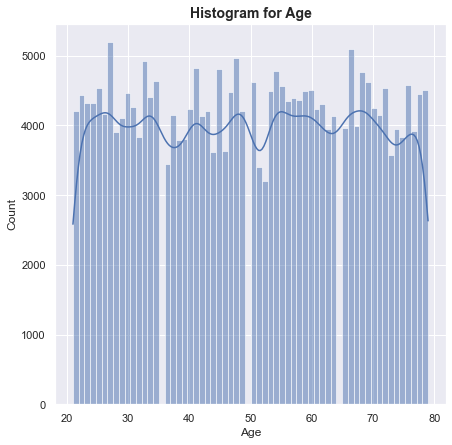

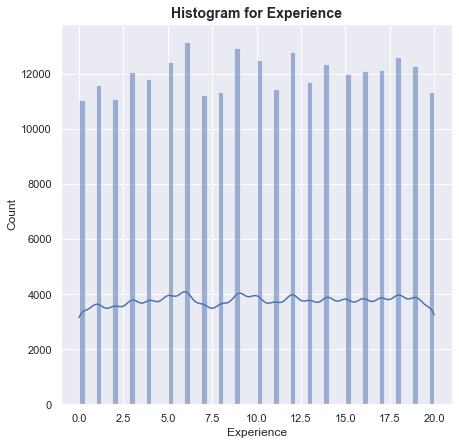

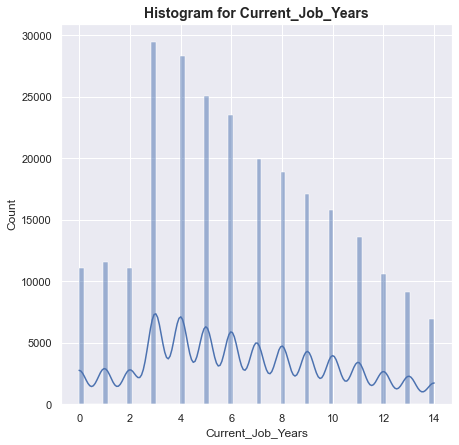

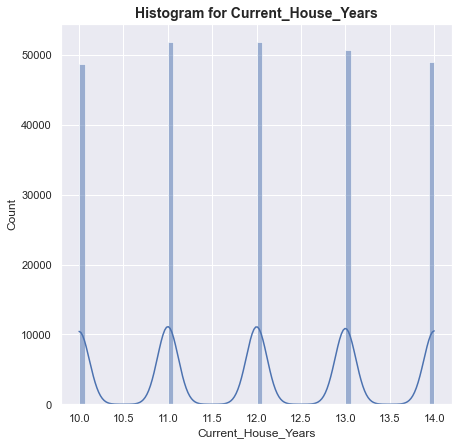

In [14]:
# To study Data Distribution of Numeric columns. Excluding the 'Id' column as it has unique values for each entry.

numerical_vars = numerical_vars[1:]
for num in numerical_vars:
    sns.set(style="darkgrid")
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    sns.histplot(data=df[numerical_vars], x=num,kde=True).set_title("Histogram for {}".format(num),fontsize=14,fontweight='bold')

### Plotting Bar Graphs for portraying the distribution of some of the Categorical Variables.

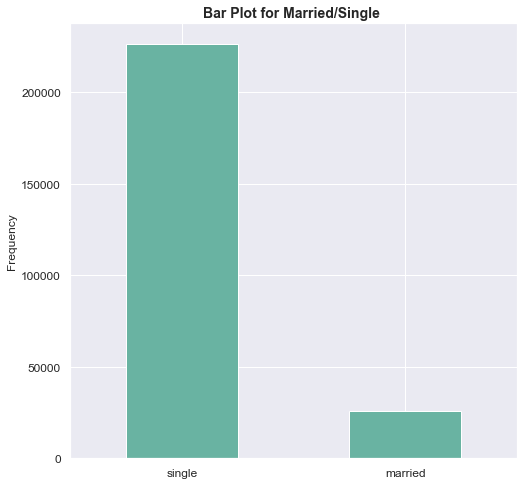

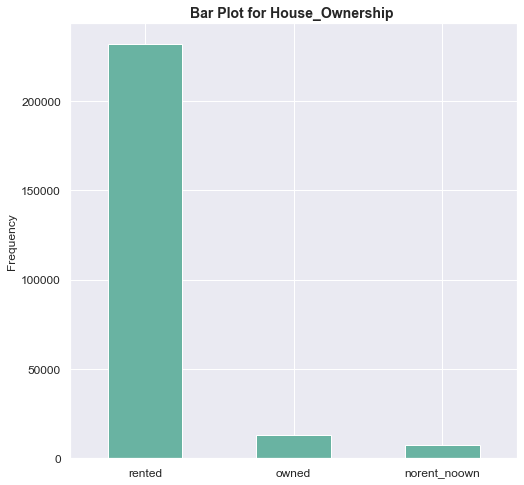

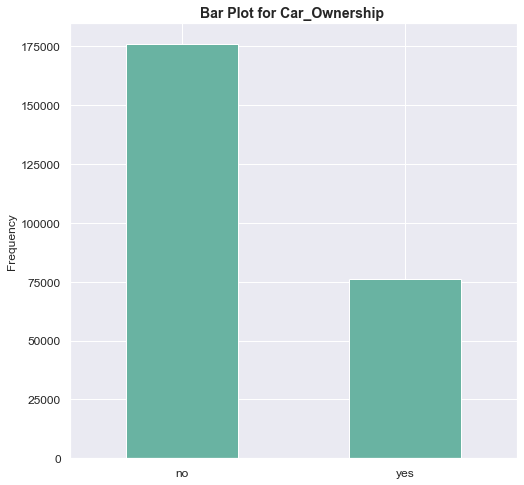

In [15]:
# Excluding the City, Profession and State columns in depicting the frequency distribution of String Variables.
string_vars = string_vars[0:3]

for val in string_vars:
    sns.set(style="darkgrid")
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))
    df[val].value_counts().plot(kind='bar',ylabel="Frequency",color='#69b3a2',rot=0,fontsize=12).set_title("Bar Plot for {} ".format(val),fontsize=14,fontweight='bold')

We have conmputed the boxplots for all the numeric features which are present in our dataset. As evident from the below Boxplots there aren't any outliers present in our dataset. None of the input datapoints which will be passed on the our model eventually are more than 1.5(IQR) above the upper quartile or more than 1.5(IQR) below the lower quartile. We do not possessany data point which is conspicuously diverse from the rest of the dataset.

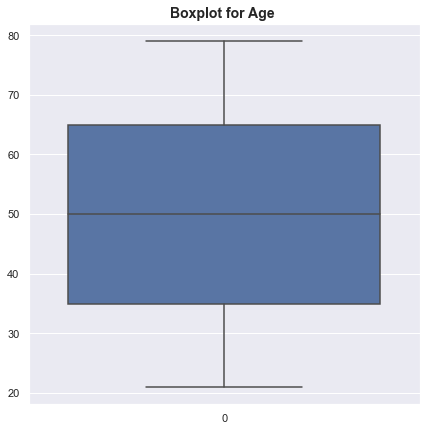

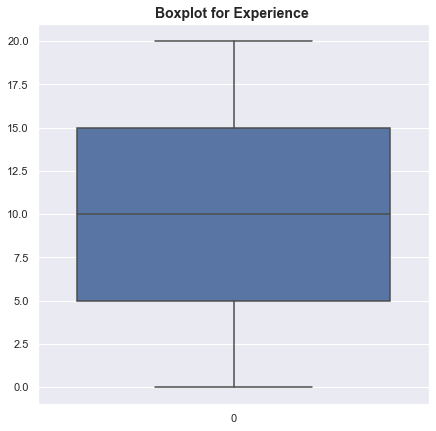

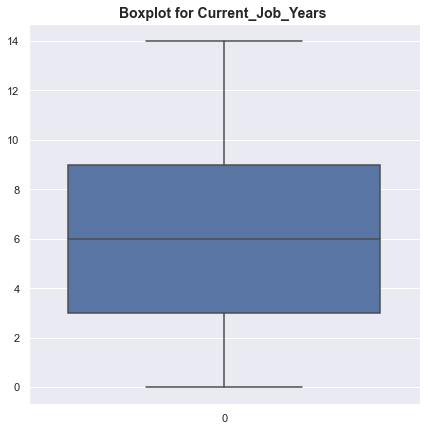

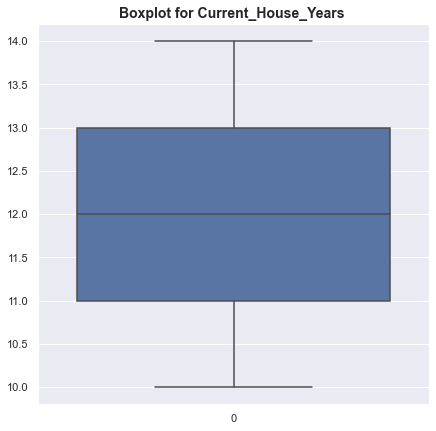

In [16]:
# Boxplot created for numeric features using seaborn

for num in numerical_vars:
    sns.set(style="darkgrid")
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    sns.boxplot(data=df[num],palette='deep').set_title("Boxplot for {} ".format(num),fontsize=14,fontweight='bold')

**4. What data pre-processing do you apply? E.g., encoding features, missing values, scaling, etc. Explain each process and why you use it. (10 points)**

### Data Preprocessing:

**In order to remove inconsistencies in the categorical(texual) features, we have created a function which will eliminate numbers if not deemed necessary for that particular feature. It will also clean the additional parentheses, punctuation and any special characters. We have then added the refined data back to our dataframe.**

In [17]:
temp_str_df = pd.DataFrame()
temp_unclean_cols = data_desc[data_desc['Data_Type']=='string']['Column_Name']
temp_str_df = df[temp_unclean_cols[3:]]
temp_str_df.head()

,Profession,City,State
0,Mechanical_engineer,Rewa,Madhya_Pradesh
1,Software_Developer,Parbhani,Maharashtra
2,Technical_writer,Alappuzha,Kerala
3,Software_Developer,Bhubaneswar,Odisha
4,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [18]:
def clean_text(text):
    text = text.encode('ascii', errors='ignore').decode('utf8')
    text = re.sub(r"[()\[\]]" , "" , text)
    text = re.sub(r"[0-9]" , "" , text)   
    text = re.sub(r"[_]" , " " , text)
    return (text)

In [19]:
temp_cols = temp_unclean_cols[3:]
for i in temp_cols:
    temp_str_df[i] = temp_str_df[i].apply(clean_text)

temp_str_df['Id'] = df_orig['Id']
temp_str_df.head()

<ipython-input-19-2dfc242c9f0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_str_df[i] = temp_str_df[i].apply(clean_text)
<ipython-input-19-2dfc242c9f0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_str_df['Id'] = df_orig['Id']


,Profession,City,State,Id
0,Mechanical engineer,Rewa,Madhya Pradesh,1
1,Software Developer,Parbhani,Maharashtra,2
2,Technical writer,Alappuzha,Kerala,3
3,Software Developer,Bhubaneswar,Odisha,4
4,Civil servant,Tiruchirappalli,Tamil Nadu,5


In [20]:
df_begin = df.iloc[:,0:7]
df_end = df.iloc[:,[0,-2,-1]]

df_refined = df_begin.merge(temp_str_df,on='Id',how='inner')
df_refined = df_refined.merge(df_end,on='Id',how='inner')
df_refined.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years
0,1,1303834,23,3,single,rented,no,Mechanical engineer,Rewa,Madhya Pradesh,3,13
1,2,7574516,40,10,single,rented,no,Software Developer,Parbhani,Maharashtra,9,13
2,3,3991815,66,4,married,rented,no,Technical writer,Alappuzha,Kerala,4,10
3,4,6256451,41,2,single,rented,yes,Software Developer,Bhubaneswar,Odisha,2,12
4,5,5768871,47,11,single,rented,no,Civil servant,Tiruchirappalli,Tamil Nadu,3,14


### One-Hot Encoding:

**As we are aware that Scikit learn models work only on numeric data, we have encoded the necessary categorical features to numeric format using 'One-Hot' Encoding technique. This technique will convert our taxtual data to an array of 0s and 1s.**

In [21]:
df_str = df_refined[['Married/Single', 'House_Ownership', 'Car_Ownership', 'State']]

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(df_str)

# 3. Transform
onehotlabels = pd.DataFrame(enc.transform(df_str).toarray())
onehotlabels

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
251996,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251997,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251998,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_processed = pd.concat([df_refined[numerical_vars], onehotlabels], axis = 1)
df_processed

,Age,Experience,Current_Job_Years,Current_House_Years,0,1,2,3,4,5,...,25,26,27,28,29,30,31,32,33,34
0,23,3,3,13,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,10,9,13,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,4,4,10,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,2,2,12,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,11,3,14,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,43,13,6,11,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
251996,26,10,6,11,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251997,46,7,7,12,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251998,45,0,0,10,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5. Analyze the balance or distribution of your target variable. Do you think any of these will present a problem and why? Provide supporting visualizations with their analysis. (10 points)**

In [23]:
import seaborn as sns

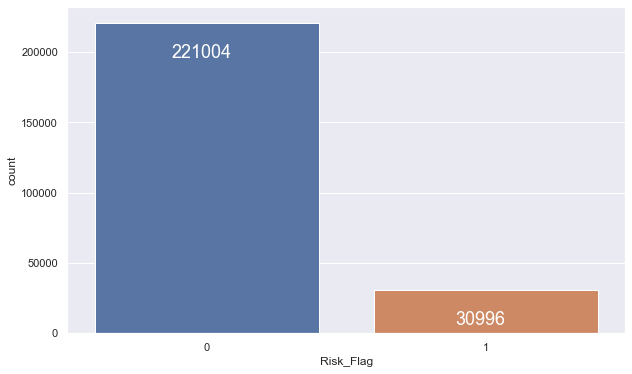

In [24]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df_orig['Risk_Flag'], data=df_orig)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.38, p.get_height()), ha='center', va='top', color='white', size=18)

**The above countplot exhibits the distribution of our target variable 'Risk_Flag'. Unfortunately we are posed with imbalanced data for the target variable. This may influence the learning of our model/s and may provide us with biased results. We will explore that shortly.**

**6. What kind of ML approaches and algorithms do you take and why? E.g., supervised,
regression, classification, binary, multi-class, split rate of data, logistic regression, SVM,
decision trees etc. Provide supporting visualizations with their analysis. (10 points)**

In [25]:
x = df_processed.values
y = df_orig.Risk_Flag.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Scaling:

**The scaling technique that we have used which will scale our near final dataset is Scikit learn's StandardScaler. It standardises features by calculating the mean and scaling to unit varaince, so that if the data possesses high variance then the scaler would scale down the data to fit it within the range of 0 to 1. Performing scaling refrains the features with high variance from biasing the learning of the model.**

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
def get_results(classifier):
    y_pred=classifier.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt="d")
    print(classification_report(y_test, y_pred))

**Performance Metrics for Logistic Regression**

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44259
           1       0.00      0.00      0.00      6141

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\lanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


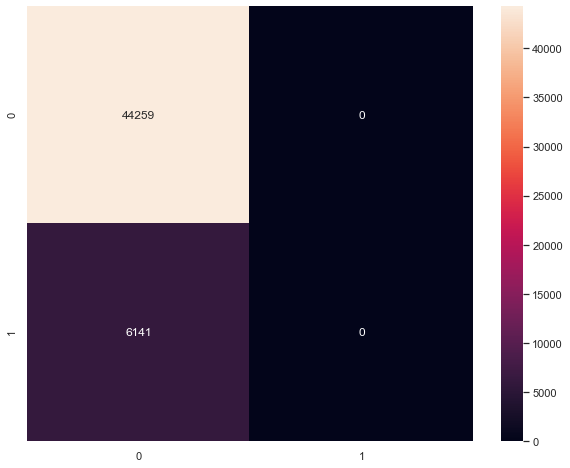

In [29]:
get_results(classifier)

### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train.flatten())

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Performance metrics using Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     44259
           1       0.52      0.55      0.53      6141

    accuracy                           0.88     50400
   macro avg       0.73      0.74      0.73     50400
weighted avg       0.89      0.88      0.88     50400



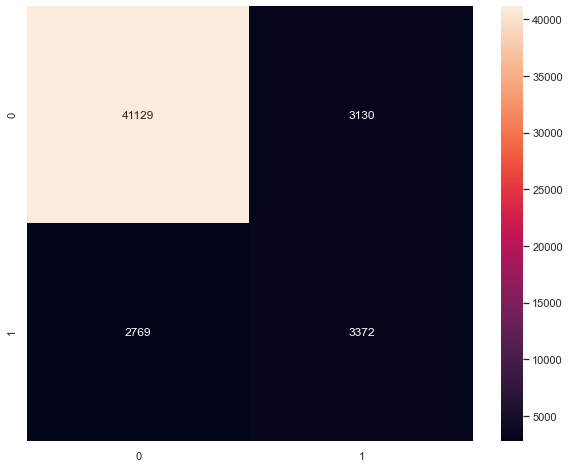

In [31]:
get_results(classifier)

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state = 0)
classifier.fit(x_train,y_train.flatten())

RandomForestClassifier(random_state=0)

**Performance metrics using Random Forest Classifier***

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44259
           1       0.58      0.53      0.55      6141

    accuracy                           0.90     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.90      0.89     50400



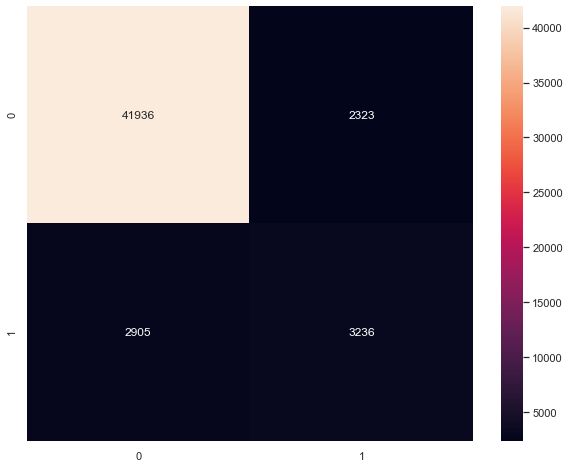

In [33]:
get_results(classifier)